In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\HP\Downloads\imarticus\EDA Practise\walmart-sales-dataset-of-45stores.csv')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

How do weekly sales vary over time for each store?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
weekly_sales_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)
weekly_sales_store

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

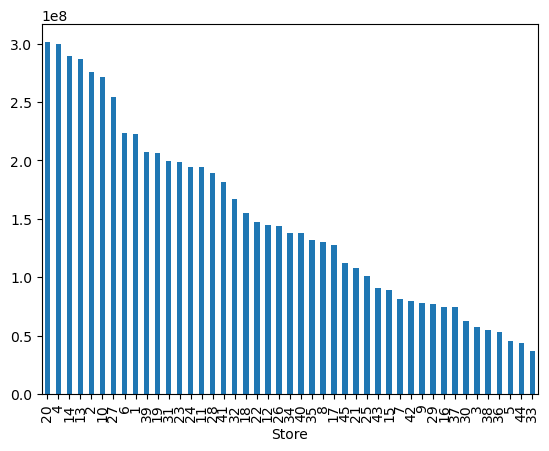

In [9]:
weekly_sales_store.plot(kind = 'bar')

Are there any noticeable trends or seasonal patterns in sales?


In [50]:
df['Month'] = df['Date'].str[3:5]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10


Are there any noticeable trends or seasonal patterns in sales?

In [51]:
seasonal_trend = df.groupby('Month')[['Weekly_Sales']].mean()
seasonal_trend 

,Weekly_Sales
Month,
01,9.238846e+05
02,1.053200e+06
03,1.013309e+06
04,1.026762e+06
05,1.031714e+06
06,1.064325e+06
07,1.031748e+06
08,1.048017e+06
09,9.893353e+05


C:\Users\Sanskruti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sanskruti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

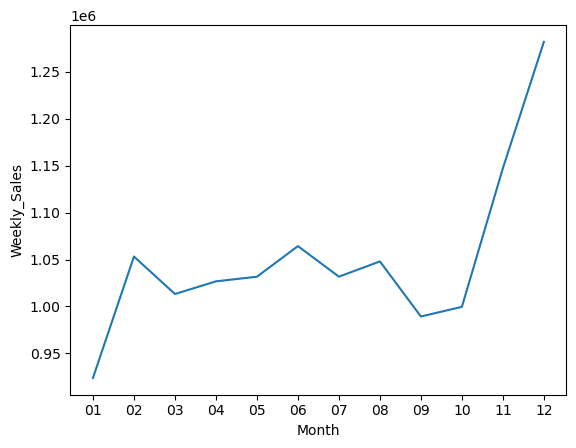

In [52]:
sns.lineplot(data = seasonal_trend, x='Month', y='Weekly_Sales')
#The sales are more during the winter season

How do holiday weeks impact weekly sales compared to non-holiday weeks?

In [53]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03


In [54]:
holiday_weeks_impact_weekly_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_weeks_impact_weekly_sales 

,Holiday_Flag,Weekly_Sales
0,0,1.041256e+06
1,1,1.122888e+06


<Axes: >

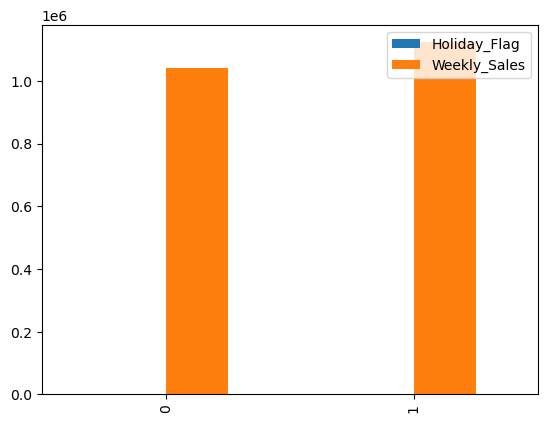

In [55]:
holiday_weeks_impact_weekly_sales.plot(kind = 'bar')

Which holidays have the most significant impact on sales?

In [56]:
#The sales are more when there is holiday

Which stores have the highest and lowest average weekly sales?

In [57]:
stores_high_low = df.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales',ascending = False)
stores_high_low

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


In [58]:
print('Highest sales : ',stores_high_low.head(1))
print('Lowest sales : ',stores_high_low.tail(1))

Highest sales :      Store  Weekly_Sales
19     20  2.107677e+06
Lowest sales :      Store   Weekly_Sales
32     33  259861.692028


How does the performance of different stores compare in terms of sales over time?

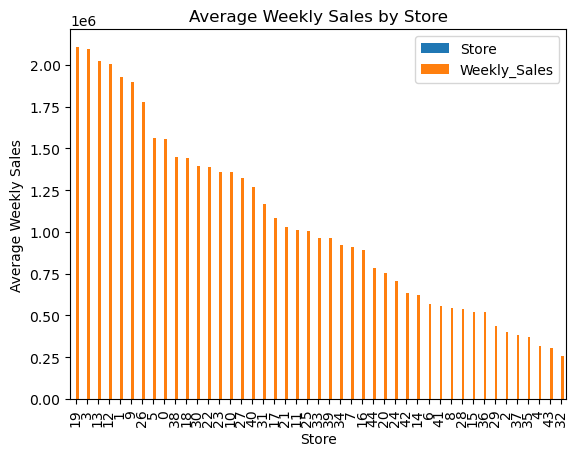

In [59]:
stores_high_low.plot(kind='bar')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()

Is there a correlation between temperature and weekly sales?

In [60]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10


In [61]:
corre = df['Temperature'].corr(df['Weekly_Sales'])
corre
#Negative Correlation (-1 ≤ corre < 0): As Temperature increases, Weekly_Sales tend to decrease.

-0.06381001317946962

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

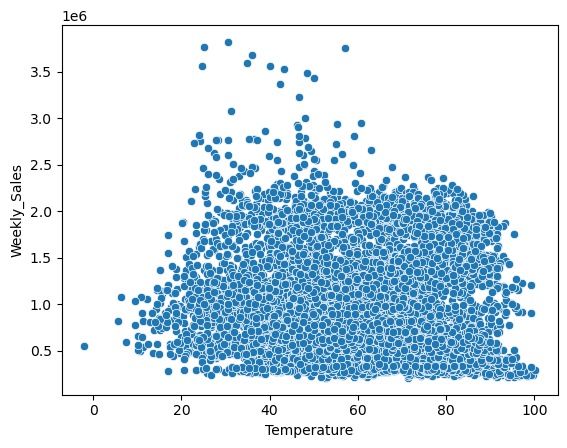

In [62]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)

How do sales vary with different temperature ranges?

In [63]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10


In [64]:
df['Temp_Range'] = np.where(df['Temperature'] <= 30, '<=30',
                      np.where(df['Temperature'] <= 40, '30-40',
                      np.where(df['Temperature'] <= 50, '40-50',
                      np.where(df['Temperature'] <= 60, '50-60',
                      np.where(df['Temperature'] <= 70, '60-70',
                      np.where(df['Temperature'] <= 80, '70-80',
                      np.where(df['Temperature'] <= 90, '80-90', '>90')))))))

In [65]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09,60-70
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,60-70
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,50-60
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,50-60


<Axes: xlabel='Temp_Range', ylabel='Weekly_Sales'>

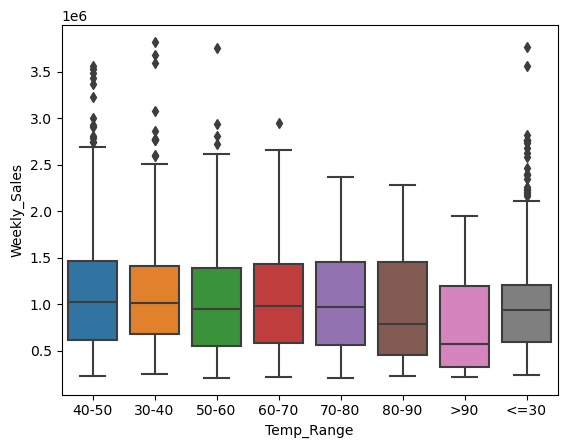

In [66]:
sns.boxplot(data= df, x = 'Temp_Range', y = 'Weekly_Sales')

What is the relationship between fuel prices and weekly sales?

In [67]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09,60-70
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,60-70
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,50-60
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,50-60


In [68]:
df['Fuel_Price'].corr(df['Weekly_Sales'])

0.009463786314475123

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

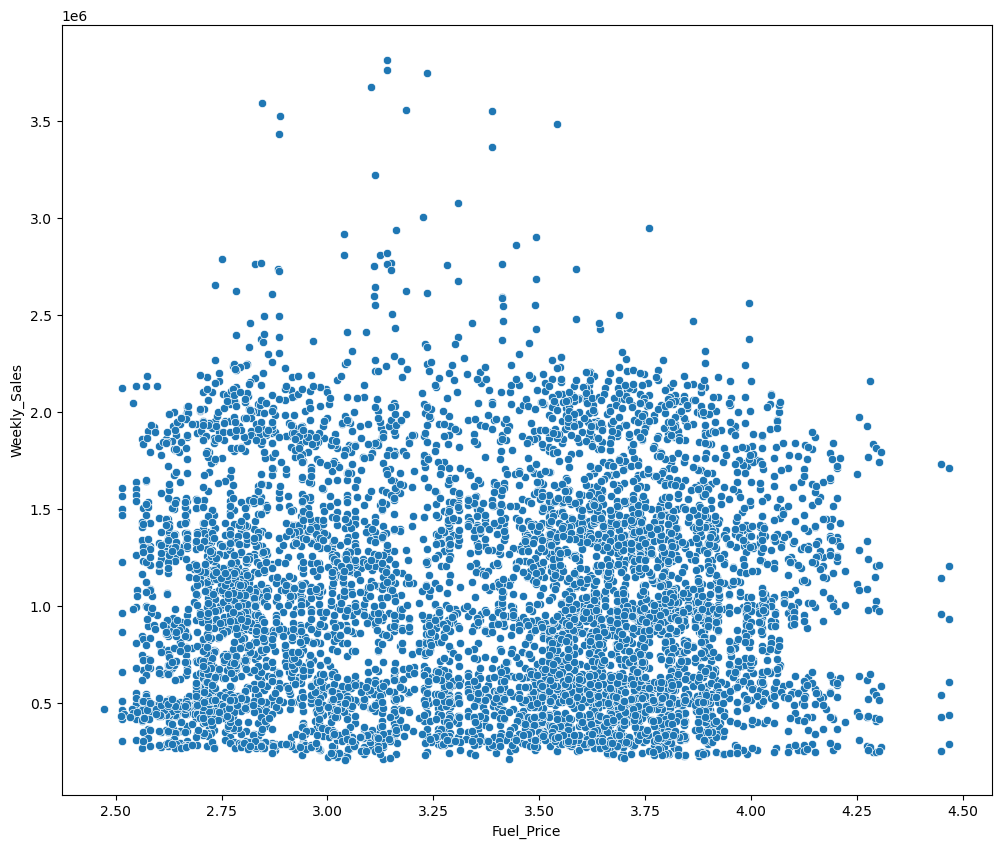

In [69]:
plt.figure(figsize = (12,10))
sns.scatterplot(data= df, x='Fuel_Price', y = 'Weekly_Sales')
#whenb fuel prices are high then sales are low

Do changes in fuel prices have a noticeable effect on sales?

In [70]:
#when fuel prices are high then sales are low

How does the Consumer Price Index (CPI) relate to weekly sales?

In [71]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50


Is there a significant correlation between CPI and sales trends?

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

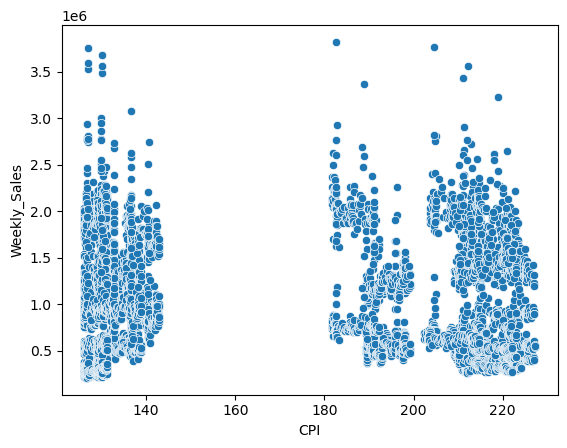

In [42]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)

How does the unemployment rate affect weekly sales?

In [74]:
df['Unemployment'].corr(df['Weekly_Sales'])


-0.10617608965795419

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

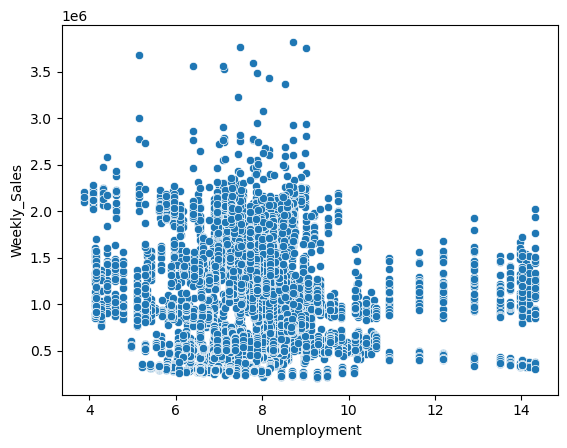

In [72]:
sns.scatterplot(x= 'Unemployment', y='Weekly_Sales', data=df )


Are there any noticeable trends between changes in the unemployment rate and sales?

In [75]:
# as unemployement increases the sales decreases

Are there any outliers or anomalies in the weekly sales data?

In [76]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

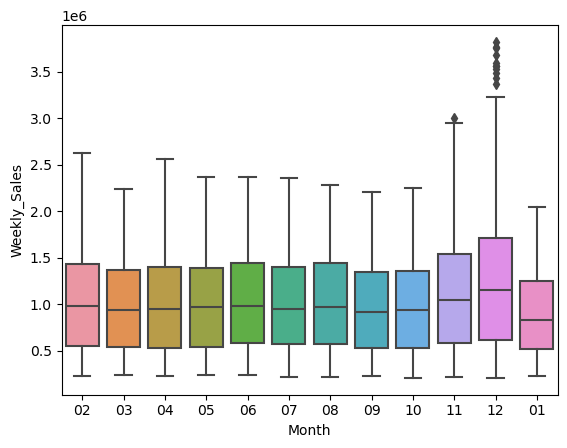

In [77]:
sns.boxplot(x= 'Month', y='Weekly_Sales', data=df)

In [78]:
from scipy import stats

In [91]:
df['z_score'] = stats.zscore(df['Weekly_Sales'])
df
#Z_SCORE - is how much standard deviations away our data is from the mean - for outliers the data is (-3,3)
#eg : if z score is 1.33 then our data is 1.33 SD away from the mean
#df.std(numeric_only=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range,z_score
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50,1.057420
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40,1.054348
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40,1.001206
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50,0.642828
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50,0.899914
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09,60-70,-0.591489
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,60-70,-0.555551
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,50-60,-0.553762
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,50-60,-0.582715


In [83]:
outliers = df[(df['z_score'] > 3)]
outliers

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range,z_score
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163,12,40-50,4.233469
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441,12,40-50,3.858439
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127,11,40-50,3.087780
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127,12,40-50,3.000220
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127,12,40-50,4.394202
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143,11,40-50,3.469180
526,4,16-12-2011,2771397.17,0,36.44,3.149,129.898065,5.143,12,30-40,3.055755
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143,12,30-40,4.659433
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003,11,50-60,3.354430
1332,10,17-12-2010,2811646.85,0,59.15,3.125,126.879484,9.003,12,50-60,3.127079


What might be causing these outliers, and how can they be addressed?


In [92]:
#When sales are more during the festive season the outliers occure as the sales are more

What are the seasonal trends in sales across different stores?

In [102]:
df['Year'] = df['Date'].str[6:]

In [103]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range,z_score,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50,1.057420,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40,1.054348,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40,1.001206,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50,0.642828,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50,0.899914,2010


<Axes: xlabel='Year,Month'>

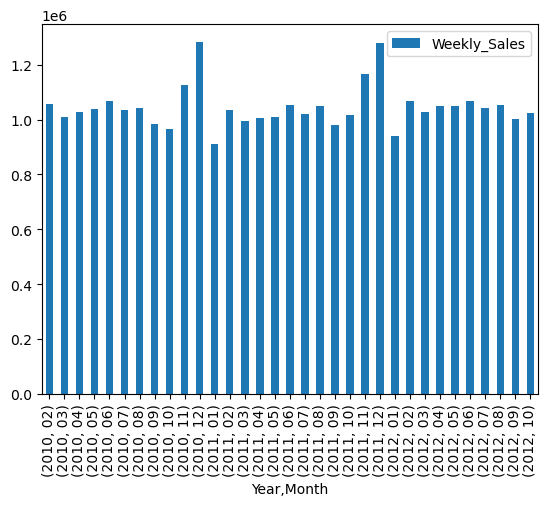

In [125]:
data = df.groupby(['Year','Month'])[['Weekly_Sales']].mean()
data
data.plot(kind = 'bar')

In [115]:
monthly_sales_pivot = df.pivot_table(index = ['Year','Month'], columns = ['Store'], values = ['Weekly_Sales'], aggfunc='mean' ).reset_index()
monthly_sales_pivot

Year Month  Weekly_Sales                                           \
Store                         1             2            3             4   
0      2010    02  1.576836e+06  2.066087e+06  427799.5575  2.074760e+06   
1      2010    03  1.467823e+06  1.919441e+06  383670.1475  1.881338e+06   
2      2010    04  1.484560e+06  1.904055e+06  379076.5960  1.853834e+06   
3      2010    05  1.482485e+06  1.944346e+06  369383.5500  1.909377e+06   
4      2010    06  1.521020e+06  2.017411e+06  368352.3050  1.887575e+06   
5      2010    07  1.448897e+06  1.863337e+06  356782.8440  1.847407e+06   
6      2010    08  1.518988e+06  1.928922e+06  364023.8600  1.940069e+06   
7      2010    09  1.457448e+06  1.815549e+06  359356.6125  1.878081e+06   
8      2010    10  1.430128e+06  1.802484e+06  359392.7120  1.904521e+06   
9      2010    11  1.621387e+06  2.117835e+06  436980.9375  2.225047e+06   
10     2010    12  1.775391e+06  2.438023e+06  486178.0720  2.493335e+06   
11     2011    01  1.370013e+06  1.737250e+06  368761.3450  1.857153e+06   
12     2011    02  1.599972e+06  2.002946e+06  424759.0075  2.175381e+06   
13     2011    03  1.576844e+06  1.882359e+06  403657.7475  2.050978e+06   
14     2011    04  1.537825e+06  1.827215e+06  376829.5040  2.006911e+06   
15     2011    05  1.532108e+06  1.790568e+06  383327.1325  2.017052e+06   
16     2011    06  1.548743e+06  1.901902e+06  393772.6600  2.072221e+06   
17     2011    07  1.445531e+06  1.785820e+06  368712.3900  2.038606e+06   
18     2011    08  1.536246e+06  1.838677e+06  384110.6400  2.121777e+06   
19     2011    09  1.475908e+06  1.713651e+06  372538.5120  2.041606e+06   
20     2011    10  1.518082e+06  1.796353e+06  389035.4875  2.150172e+06   
21     2011    11  1.716243e+06  2.099349e+06  455742.9075  2.433224e+06   
22     2011    12  1.806519e+06  2.355367e+06  482761.3660  2.628969e+06   
23     2012    01  1.430923e+06  1.729230e+06  370238.3850  1.980815e+06   
24     2012    02  1.699519e+06  2.024278e+06  448192.4200  2.300584e+06   
25     2012    03  1.640399e+06  1.902837e+06  429617.3000  2.160942e+06   
26     2012    04  1.627804e+06  1.919096e+06  438365.0275  2.195978e+06   
27     2012    05  1.611741e+06  1.938802e+06  425928.2450  2.171495e+06   
28     2012    06  1.604117e+06  1.930402e+06  432628.6800  2.196894e+06   
29     2012    07  1.558487e+06  1.862293e+06  412493.0875  2.137232e+06   
30     2012    08  1.579524e+06  1.912942e+06  405601.8240  2.171569e+06   
31     2012    09  1.530595e+06  1.822367e+06  405006.0000  2.097505e+06   
32     2012    10  1.561397e+06  1.895379e+06  421076.9550  2.147431e+06   

                                                             ...               \
Store            5             6            7             8  ...           36   
0      300682.0000  1.564753e+06  505918.5350  9.526227e+05  ...  463727.7275   
1      285284.6700  1.581266e+06  515263.3700  8.385726e+05  ...  438732.0325   
2      310764.5500  1.599176e+06  446008.6880  8.685130e+05  ...  452941.1460   
3      310456.2425  1.580097e+06  401514.4100  8.691334e+05  ...  472018.5400   
4      310880.1750  1.715241e+06  510655.7625  8.894757e+05  ...  464843.6625   
5      284435.1000  1.625553e+06  579995.5660  8.238130e+05  ...  451480.1780   
6      291311.3750  1.542898e+06  594675.4950  8.802031e+05  ...  446970.0925   
7      301505.3275  1.379820e+06  511487.9325  8.352236e+05  ...  434952.1575   
8      283474.8500  1.350282e+06  466110.6100  8.336356e+05  ...  427487.9580   
9      353221.2700  1.696818e+06  576453.5875  9.965266e+05  ...  413043.0925   
10     365858.8060  1.958740e+06  728725.4920  1.105527e+06  ...  391286.0120   
11     275346.4250  1.301231e+06  560865.1175  8.219092e+05  ...  391630.6875   
12     323121.4625  1.499159e+06  559252.3025  9.807920e+05  ...  406619.3425   
13     307260.4825  1.530239e+06  576104.6225  8.904778e+05  ...  408057.7150   
14     313054.1500  1.512255e+06  462873.3180  9.0

How does the impact of holidays on sales vary across different stores?

In [126]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range,z_score,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50,1.057420,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40,1.054348,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40,1.001206,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50,0.642828,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50,0.899914,2010


In [132]:
holi = df.groupby(['Store','Holiday_Flag'])[['Weekly_Sales']].mean()
holi

Weekly_Sales
Store Holiday_Flag              
1     0             1.546957e+06
      1             1.665748e+06
2     0             1.914209e+06
      1             2.079267e+06
3     0             4.000648e+05
...                          ...
43    1             6.359463e+05
44    0             3.032536e+05
      1             2.960356e+05
45    0             7.821985e+05
      1             8.362937e+05

[90 rows x 1 columns]

What is the distribution of weekly sales across all stores?

In [133]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Temp_Range,z_score,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,40-50,1.057420,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,30-40,1.054348,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,30-40,1.001206,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,40-50,0.642828,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,40-50,0.899914,2010


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

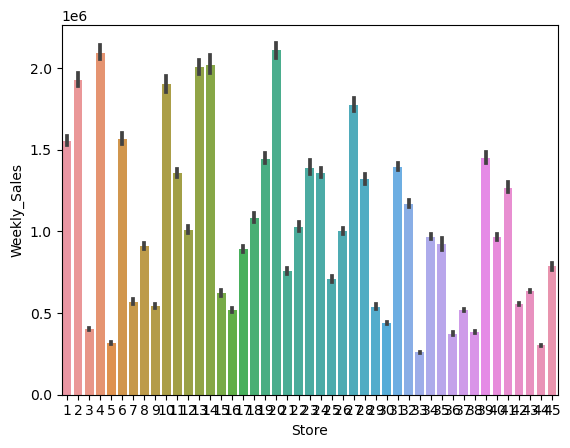

In [138]:
sns.barplot(data = df, x = 'Store', y= 'Weekly_Sales')

<Axes: xlabel='Weekly_Sales'>

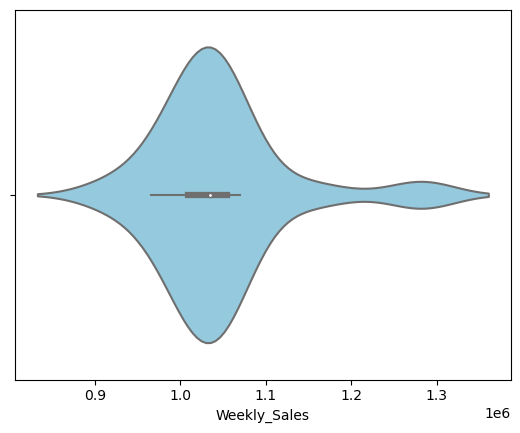

In [136]:
sns.violinplot(x=data['Weekly_Sales'], color='skyblue')